# Feature Scaling, Extraction & Image Processing Workshop
## A Practical Hands-on Guide with Open Datasets

In [ ]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.datasets import fetch_openml
import cv2
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

## 1. Feature Scaling with Breast Cancer Dataset

### Objective:
- Understand why feature scaling is crucial for machine learning
- Compare different scaling techniques: StandardScaler, MinMaxScaler, RobustScaler
- Visualize the effects of scaling on data distribution

In [54]:
# Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploratory Data Analysis (EDA)

In [58]:
# Check basic statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


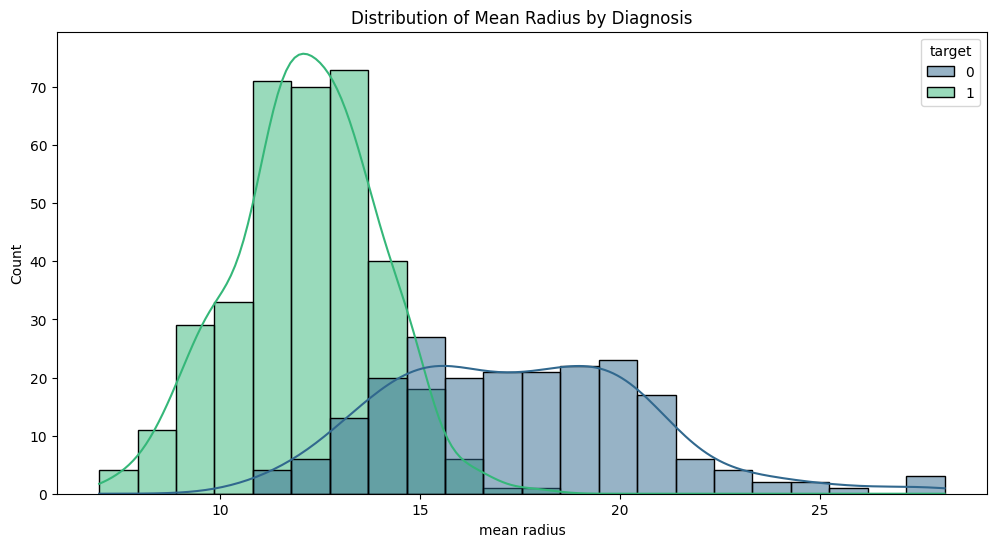

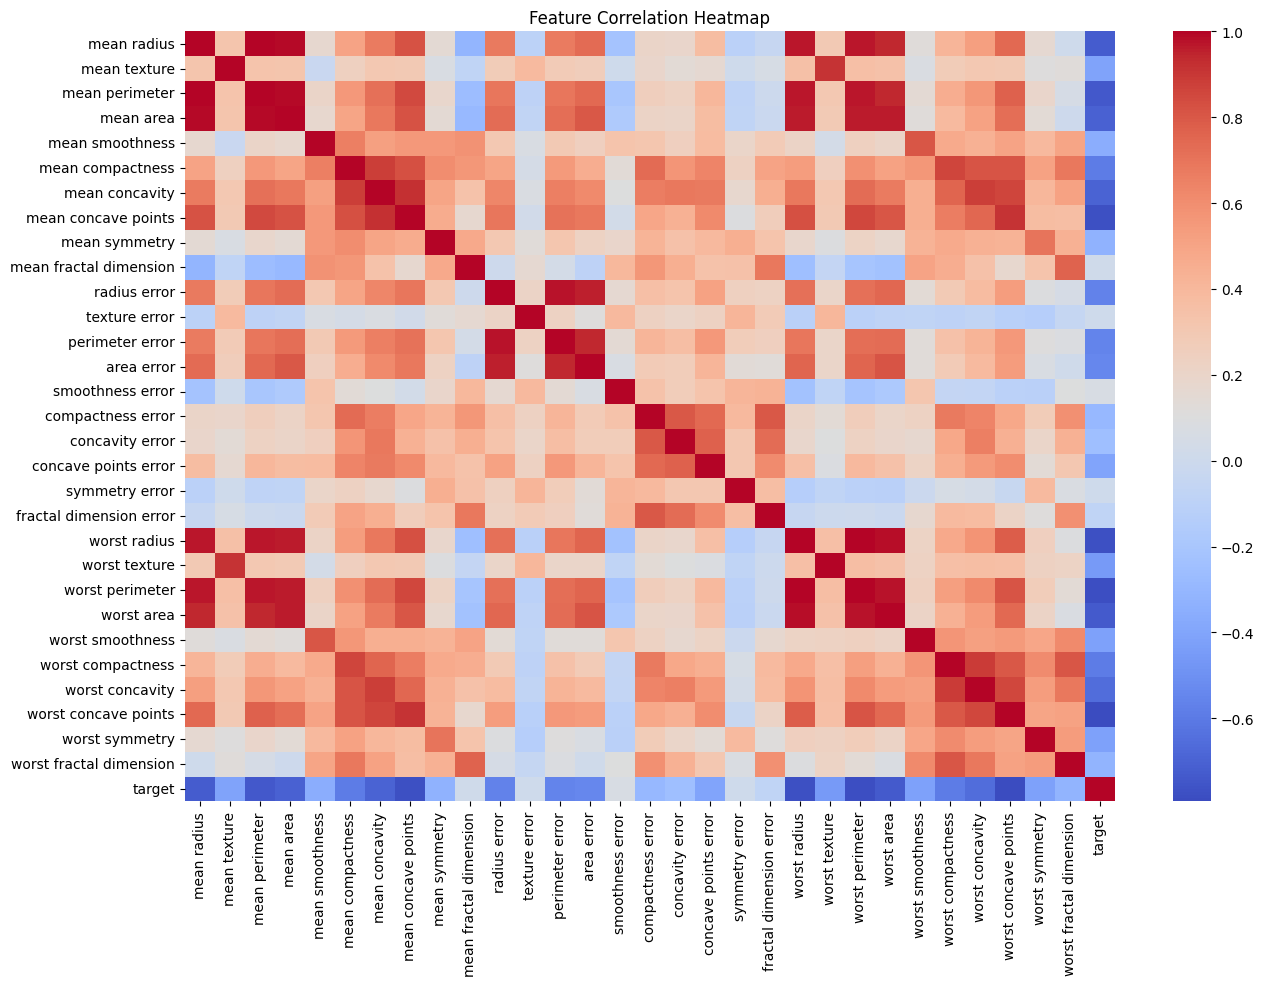

In [56]:
# Plot feature distributions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='mean radius', kde=True, hue='target', palette='viridis')
plt.title('Distribution of Mean Radius by Diagnosis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Feature Scaling Implementation

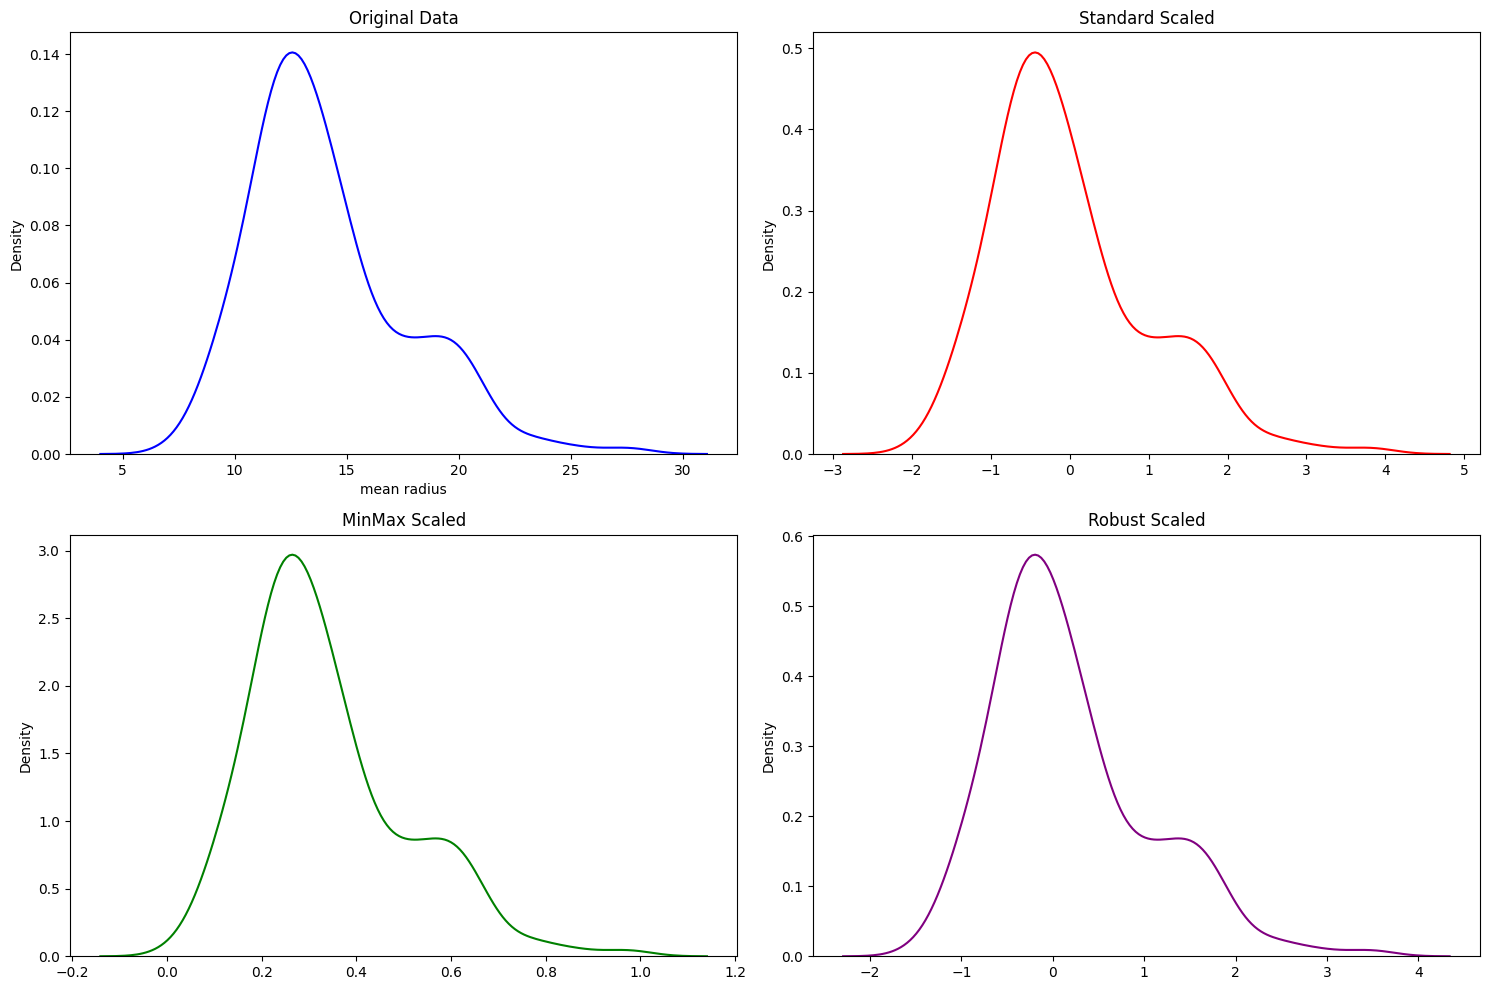

In [59]:
# Select features to scale
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
X = df[features]
y = df['target']

# Initialize scalers
scaler = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

# Apply scaling
X_std = scaler.fit_transform(X)
X_minmax = minmax.fit_transform(X)
X_robust = robust.fit_transform(X)

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.kdeplot(X['mean radius'], ax=axes[0,0], color='blue').set_title('Original Data')
sns.kdeplot(X_std[:,0], ax=axes[0,1], color='red').set_title('Standard Scaled')
sns.kdeplot(X_minmax[:,0], ax=axes[1,0], color='green').set_title('MinMax Scaled')
sns.kdeplot(X_robust[:,0], ax=axes[1,1], color='purple').set_title('Robust Scaled')
plt.tight_layout()
plt.show()

Scaling is important because many machine learning algorithms (like KNN, SVM, and gradient-based models) are sensitive to feature magnitudes, and scaling ensures that all features contribute equally to the model's learning process.

🔹 StandardScaler:

It centers the data (makes the mean = 0) and scales it so that the standard deviation = 1.

It assumes your data is normally distributed (bell-shaped).

Use it when: your features have different scales and you want them to behave like a standard normal distribution.

🔹 MinMaxScaler:

It shrinks (scales) all features to a fixed range, usually between 0 and 1.

It preserves the shape of the data but compresses it.

Use it when: you need bounded inputs (e.g., neural networks) or you care about keeping relative differences between points.

🔹 RobustScaler:

It centers the data using the median and scales it using the interquartile range (IQR) (i.e., between the 25th and 75th percentiles).

It’s resistant to outliers (unlike StandardScaler and MinMaxScaler).



## 2. Feature Extraction with PCA on Iris Dataset

### Objective:
- Understand dimensionality reduction
- Visualize high-dimensional data in 2D/3D
- Compare PCA with original features

In [60]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['target'] = y
df_iris['species'] = df_iris['target'].map({i:name for i,name in enumerate(target_names)})
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


We standardize the features so that all measurements are on the same scale (very important for PCA to work properly).

Then, we apply PCA to create two new features (PC1 and PC2) that capture as much of the original information as possible.

We plot the data based on these two components to see natural groupings (like the different iris species) more clearly.

We also check how much variance each principal component explains — meaning how much information from the original data is preserved.

### EDA for Iris Dataset

<Figure size 3000x3000 with 0 Axes>

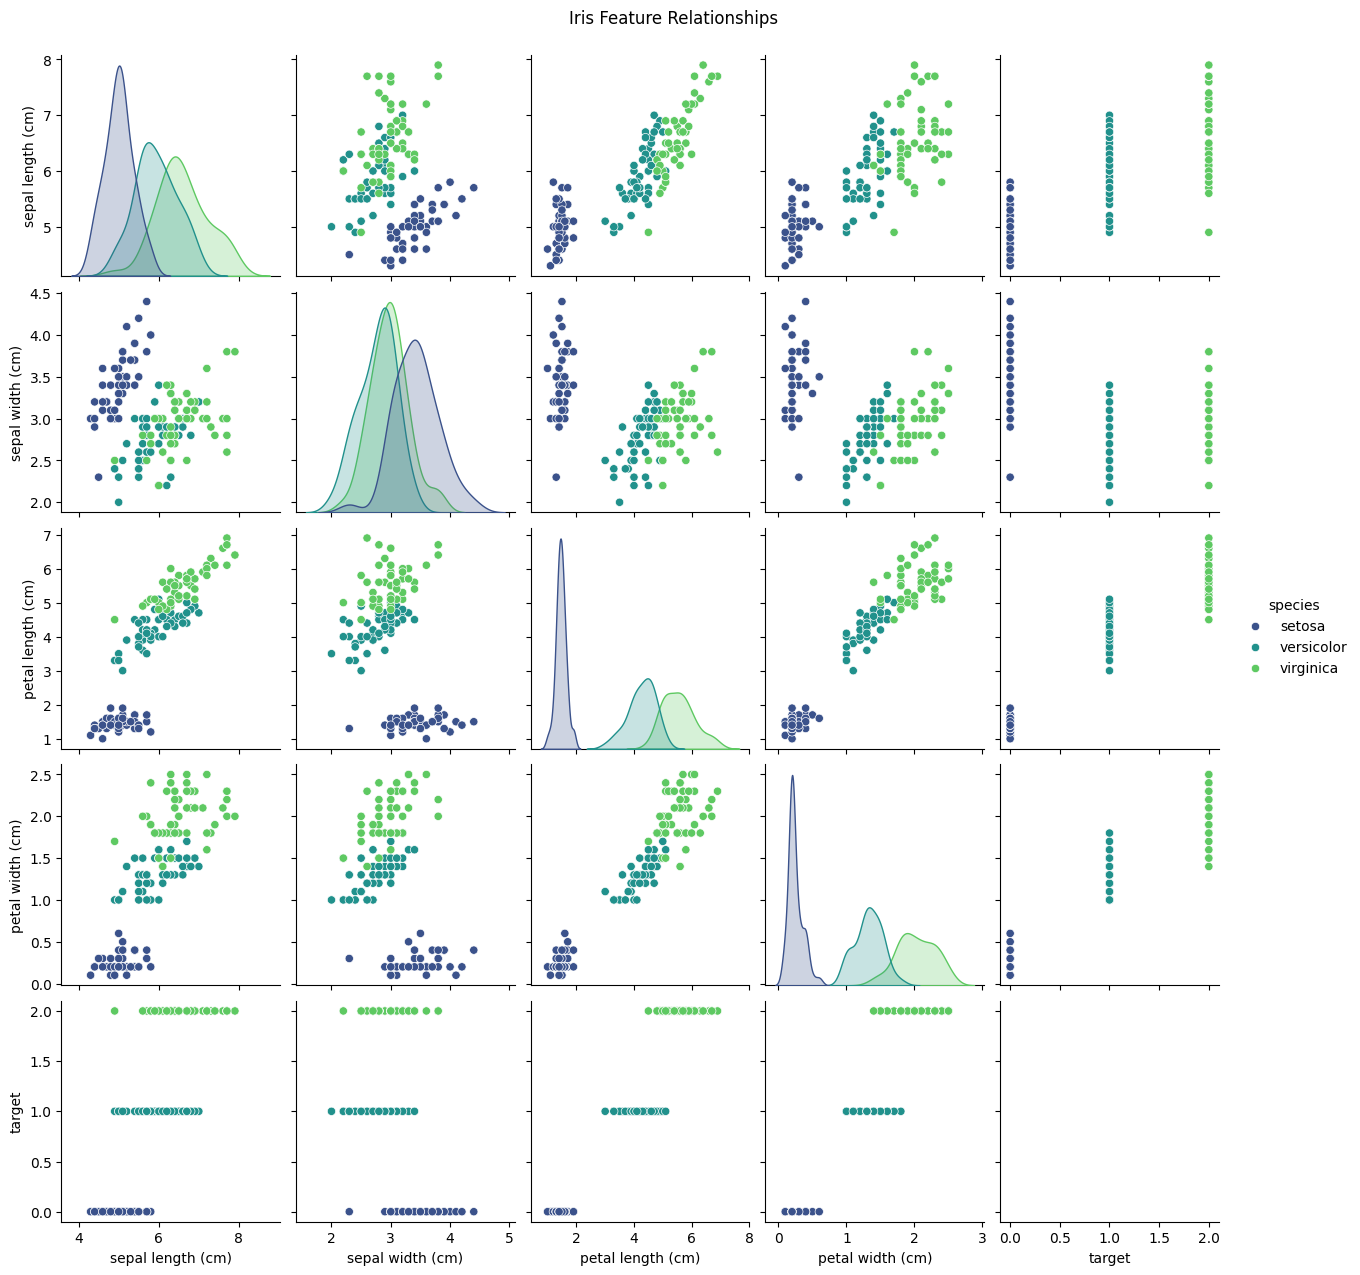

In [61]:
# Pairplot to see feature relationships
plt.figure(figsize=(30,30))
sns.pairplot(df_iris, hue='species', palette='viridis')
plt.suptitle('Iris Feature Relationships', y=1.02)
plt.show()

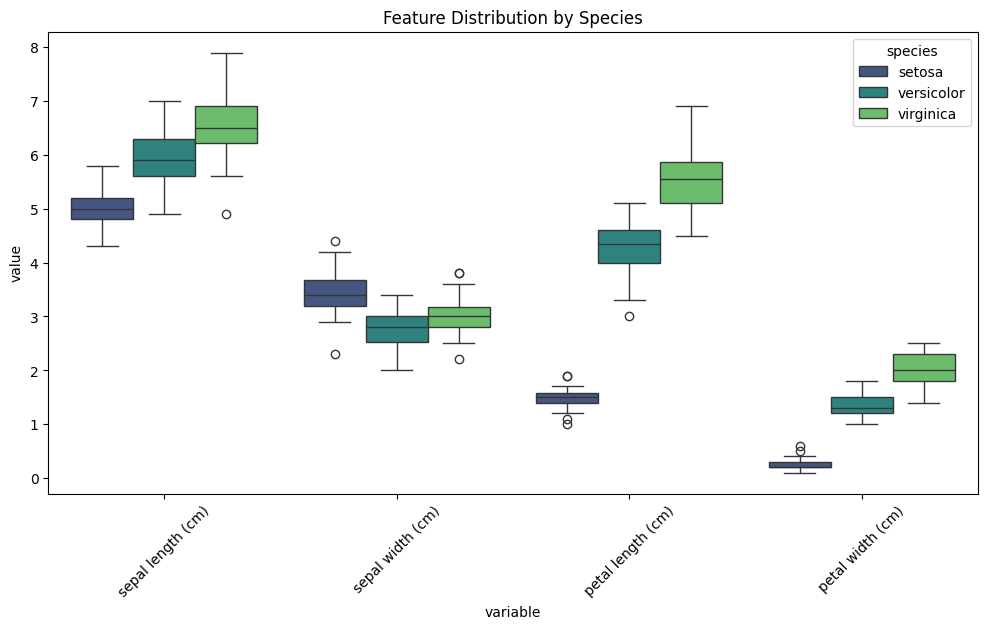

In [62]:
# Boxplot of features
plt.figure(figsize=(12,6))
df_melt = pd.melt(df_iris, id_vars='species', value_vars=feature_names)
sns.boxplot(x='variable', y='value', hue='species', data=df_melt, palette='viridis')
plt.title('Feature Distribution by Species')
plt.xticks(rotation=45)
plt.show()

### PCA Implementation

In [63]:
# Standardize data first
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create PCA DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df_iris['species']

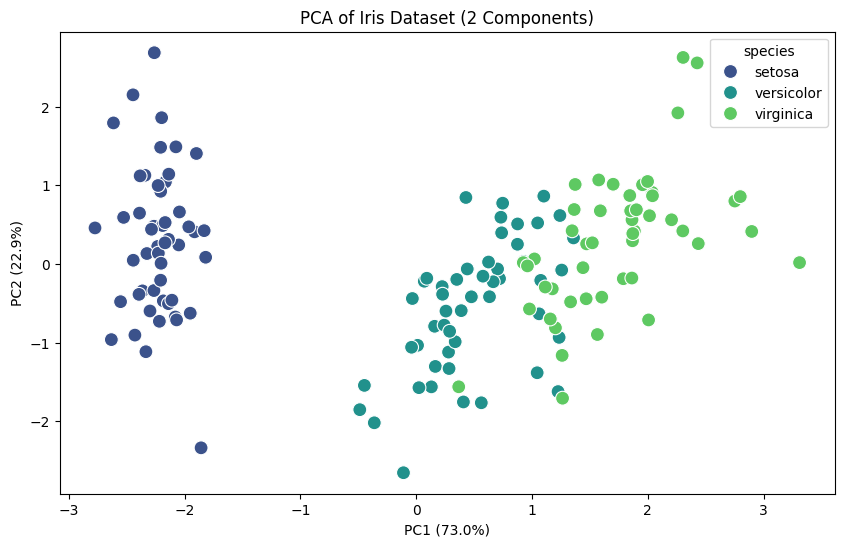

In [64]:
# Plot results
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Iris Dataset (2 Components)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.show()

- Tight clusters -->	Similar samples
- Big separation between groups -->	Classes are well-separated
- Overlapping groups -->	PCA couldn't fully separate them (might need more components)
- Very low explained variance -->	PCA lost important information

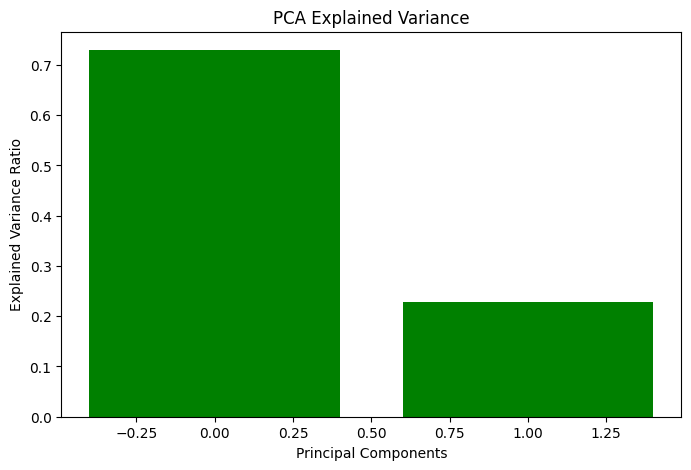

In [65]:
# Variance explained
plt.figure(figsize=(8,5))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='green')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

## 3. Image Processing with MNIST

### Objective:
- Learn basic image processing with OpenCV
- Understand image vectorization for ML
- Visualize image transformations

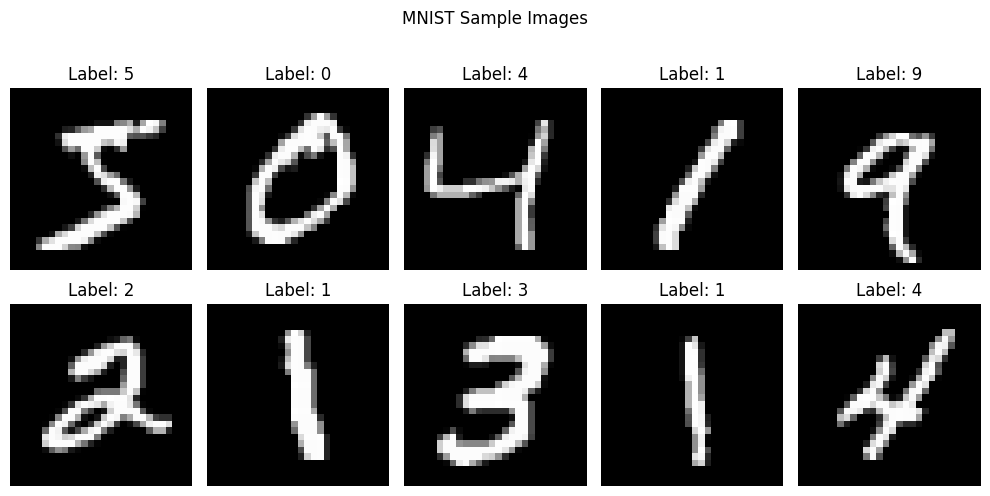

In [66]:
# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
X = X.reshape(-1, 28, 28)  # Reshape to images

# Display sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle('MNIST Sample Images', y=1.02)
plt.tight_layout()
plt.show()

In [67]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Image Processing Techniques

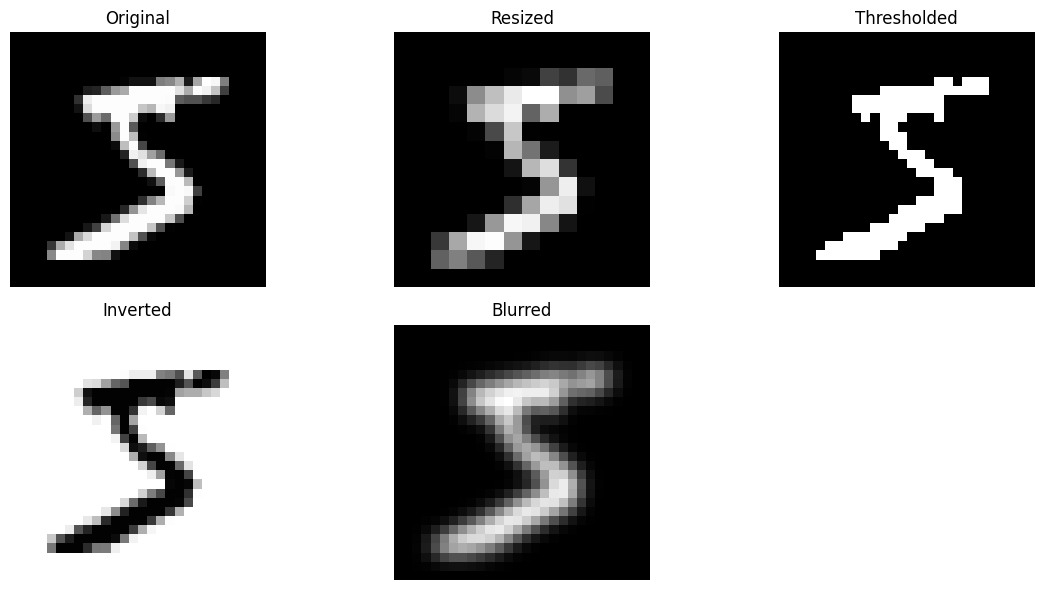

In [68]:
# Select a sample image
sample_img = X[0]
sample_img = sample_img.astype(np.uint8)

# 1. Resize
resized_img = cv2.resize(sample_img, (14,14))

# 2. Thresholding
_, thresh_img = cv2.threshold(sample_img, 127, 255, cv2.THRESH_BINARY)

# 3. Bitwise NOT (invert)
inverted_img = cv2.bitwise_not(sample_img)

# 4. Gaussian Blur
blurred_img = cv2.GaussianBlur(sample_img, (5,5), 0)

# Display transformations
transformations = {
    'Original': sample_img,
    'Resized': resized_img,
    'Thresholded': thresh_img,
    'Inverted': inverted_img,
    'Blurred': blurred_img
}

plt.figure(figsize=(12,6))
for i, (title, img) in enumerate(transformations.items()):
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Feature Extraction from Images

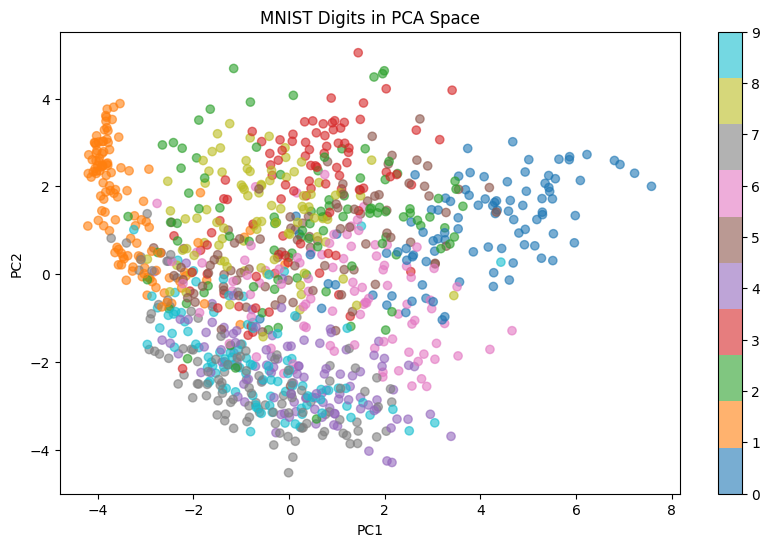

In [69]:
# Flatten images for ML
X_flat = X.reshape(-1, 28*28)

# Normalize pixel values
X_norm = X_flat / 255.0

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm[:1000])  # Use subset for speed

# Plot in PCA space
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y[:1000].astype(int), cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title('MNIST Digits in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The MNIST images are first flattened into 1D arrays, then normalized by scaling pixel values to the range [0, 1]. PCA is applied to reduce the data to 2 dimensions for visualization, and the plot shows how different MNIST digit classes (color-coded) are distributed in the reduced PCA space.

## 4. Linear Discriminant Analysis (LDA)

### Objective:
- Understand supervised dimensionality reduction
- Compare LDA with PCA
- Visualize class separation

In [70]:
# Apply LDA
lda = LDA(n_components=2)

X = df_iris.drop('species', axis=1)  # Features (exclude the target 'species' column)
y = df_iris['species']  # Target labels
X_std = StandardScaler().fit_transform(X)  # Standardize features

# Fit LDA
X_lda = lda.fit_transform(X_std, y)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# LDA Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='viridis', s=100)
plt.title('LDA of Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()  # Ensure the plot is displayed

# Compare with PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100, ax=ax1)
ax1.set_title('PCA Projection')

# Plot LDA
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='viridis', s=100, ax=ax2)
ax2.set_title('LDA Projection')

plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x600 with 0 Axes>

LDA (Linear Discriminant Analysis) is a technique that reduces dimensions like PCA, but it’s different because LDA also uses class labels (y) to find directions that best separate the classes.
It tries to make different groups (like the iris species) as distinct as possible when projecting the data into a lower-dimensional space.

## 5. End-to-End Example: Breast Cancer Classification

### Objective:
- Combine all concepts in a complete workflow
- Compare model performance with/without scaling
- Evaluate feature importance

In [71]:
# Prepare data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model without scaling
model_raw = RandomForestClassifier(random_state=42)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

In [72]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:

# Model with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = RandomForestClassifier(random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [74]:
# Compare results
print(f"Accuracy without scaling: {accuracy_score(y_test, y_pred_raw):.2f}")
print(f"Accuracy with scaling: {accuracy_score(y_test, y_pred_scaled):.2f}")

Accuracy without scaling: 0.96
Accuracy with scaling: 0.96


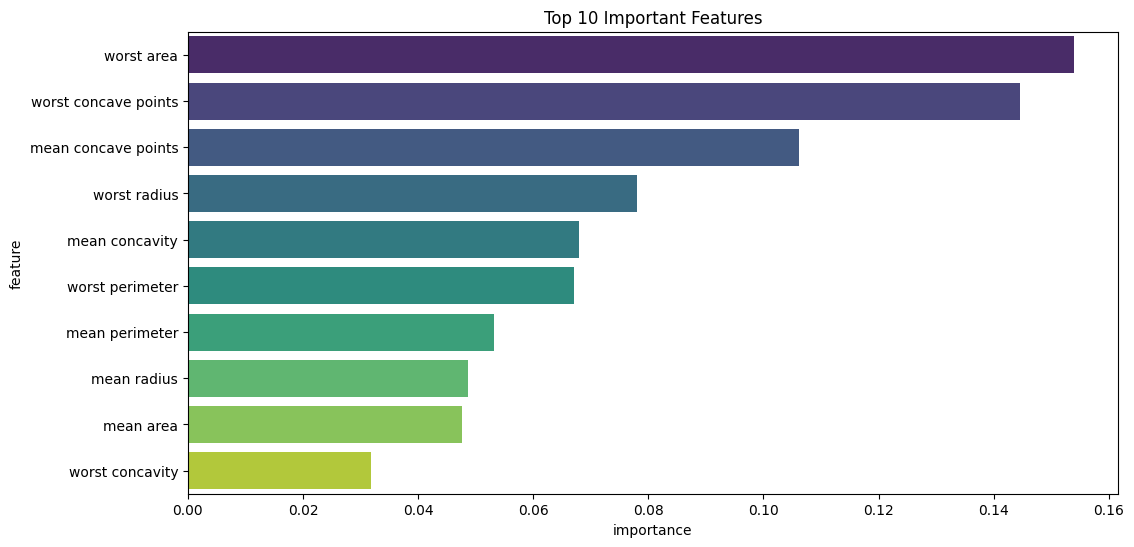

In [75]:
# Feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_scaled.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=importance.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.show()

## Workshop Summary
1. **Feature Scaling**: Essential for distance-based algorithms
2. **Feature Extraction**: PCA for visualization, LDA for classification
3. **Image Processing**: Resize, threshold, invert for better features
4. **Complete Workflow**: EDA → Preprocessing → Modeling → Evaluation

### Next Steps:
- Try different classifiers (SVM, KNN)
- Experiment with kernel PCA
- Apply to your own datasets